In [1]:
from datgan import DATGAN
import datgan

import numpy as np
import pandas as pd
import networkx as nx

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import tensorflow as tf

#tf.config.run_functions_eagerly(True)

In [2]:
df = pd.read_csv('../../data/LTDS/cleaned_region.csv')

In [3]:
df.head()

,gender,age,ethnicity,hh_people,hh_income,hh_carvan,hh_comp,hh_region
0,female,36,Asian,5,25-35k,2,Couple family,East London
1,male,35,Asian,5,25-35k,2,Couple family,East London
2,female,9,Asian,5,25-35k,2,Couple family,East London
3,female,6,Asian,5,25-35k,2,Couple family,East London
4,female,0,Asian,5,25-35k,2,Couple family,East London


In [4]:
data_info = {
    'age': {
        'type': 'continuous',
        'bounds': [0, 100],
        'discrete': True
    }
}

# Add the other variables as categorical
for c in df.columns:
    if c not in data_info.keys():
        data_info[c] = {'type': 'categorical'}

In [5]:
graph = nx.DiGraph()

graph.add_edges_from([
    ('age', 'hh_comp'),
    ('gender', 'hh_comp'),
    ('ethnicity', 'hh_people'),
    ('hh_region', 'hh_comp'),
    ('hh_region', 'hh_carvan'),
    ('hh_region', 'hh_income'),
    ('hh_comp', 'hh_income'),
    ('hh_comp', 'hh_people'),
    ('hh_income', 'hh_carvan'),
    ('hh_people', 'hh_carvan')
])

Preparing advice...
You might want to add the following edges in your DAG (direction not given here):
  - hh_carvan <-> hh_comp
  - age <-> hh_people


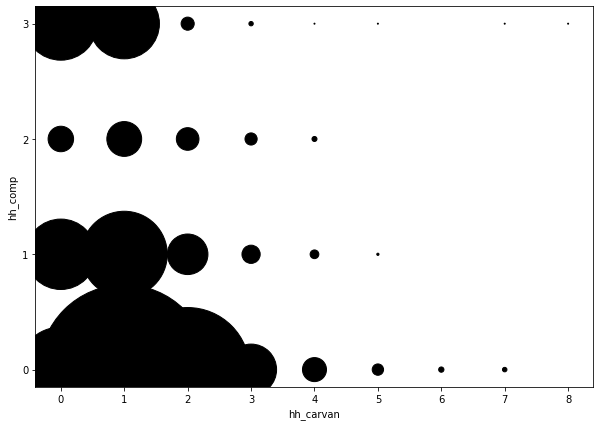

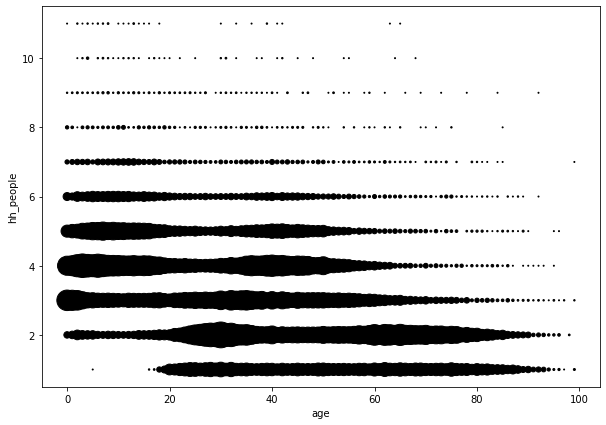

In [6]:
datgan.advise(df, graph, plot_graphs=True)

In [7]:
name = 'ciDATGAN_region'

In [8]:
output_folder = './output/{}/'.format(name)

In [9]:
datgan = DATGAN(output=output_folder,
                loss_function='WGAN',
                conditional_inputs=['age', 'gender', 'hh_region'],
                batch_size=2285,
                num_epochs=1000)

In [10]:
datgan.fit(df, data_info, graph, preprocessed_data_path='./output/encoded_region')

Preprocessing the data!
Encoding categorical variable "gender"...
Encoding continuous variable "age"...
Encoding categorical variable "ethnicity"...
Encoding categorical variable "hh_people"...
Encoding categorical variable "hh_income"...
Encoding categorical variable "hh_carvan"...
Encoding categorical variable "hh_comp"...
Encoding categorical variable "hh_region"...
Preprocessed data have been saved in './output/encoded_region'
Start training DATGAN with the WGAN loss (16/06/2022 11:25:34).


Training DATGAN: 100%|██████████| 1000/1000 [1:05:57<00:00,  3.96s/it]

DATGAN has finished training (16/06/2022 12:31:32) - Training time: 01 hour, 05 minutes, and 57 seconds


# Sampling

In [11]:
samp = datgan.sample(len(df), inputs=df[datgan.conditional_inputs], randomize=False)
samp.to_csv('../../data/synthetic/ciDATGAN_region.csv', index=False)

Sampling from DATGAN: 100%|██████████| 82268/82268 [00:01<00:00, 47289.28it/s]


In [12]:
regions = ['Central London', 'West London', 'East London', 'South London', 'North London']

In [15]:
count = 1
for r in regions:

    tmp = pd.read_csv('../../data/nomis/{}.csv'.format(r))

    tmp = tmp.iloc[np.random.permutation(len(tmp))]
    tmp.index = range(len(tmp))

    print('Sampling for {} ({}/{})'.format(r, count, len(regions)))

    samp = datgan.sample(len(tmp), inputs=tmp, randomize=False)

    samp.to_csv('../../data/ciDATGAN/{}.csv'.format(r), index=False)

    count += 1

Sampling for Central London (1/5)



Sampling from DATGAN: 100%|██████████| 1403252/1403252 [01:27<00:00, 16068.94it/s]


Sampling for West London (2/5)



Sampling from DATGAN: 100%|██████████| 2065066/2065066 [02:53<00:00, 11914.52it/s]


Sampling for East London (3/5)



Sampling from DATGAN: 100%|██████████| 2252181/2252181 [03:21<00:00, 11151.09it/s]


Sampling for South London (4/5)



Sampling from DATGAN: 100%|██████████| 1529664/1529664 [01:42<00:00, 14976.17it/s]


Sampling for North London (5/5)



Sampling from DATGAN: 100%|██████████| 923778/923778 [00:41<00:00, 22087.74it/s]
